In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('DS1_C9_S5_Practice_Diabetes_Data.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


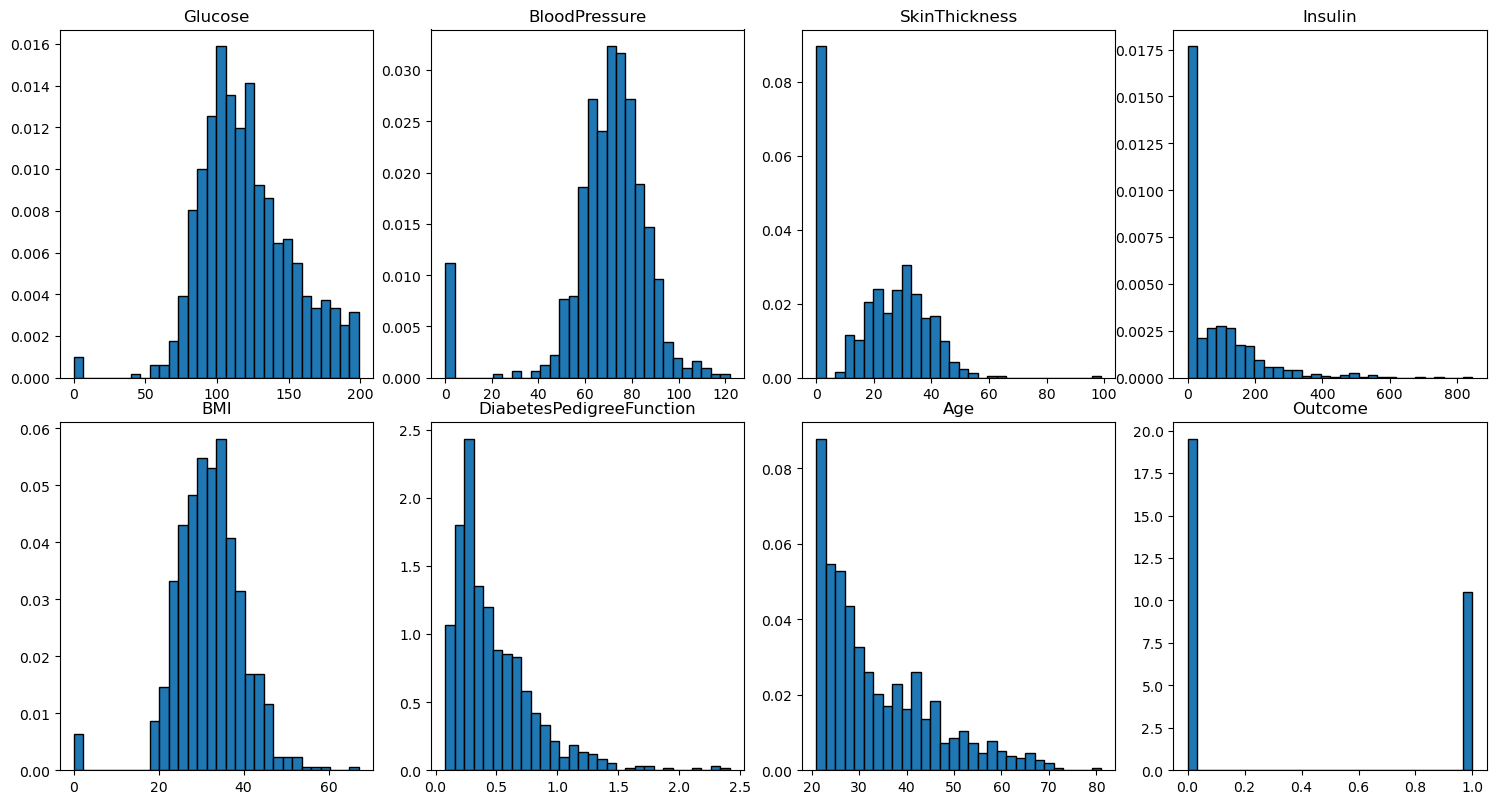

In [3]:
fig,ax=plt.subplots(2,4,figsize=(15,8))
fig.tight_layout()
col=df.columns
k = 0
for i in range(0,2):
    for j in range(0,4):
        ax[i,j].hist(df[col[k]],30,density = True,edgecolor='black')
        ax[i,j].set_title(label=col[k])
        k = k + 1
plt.show()

<Axes: >

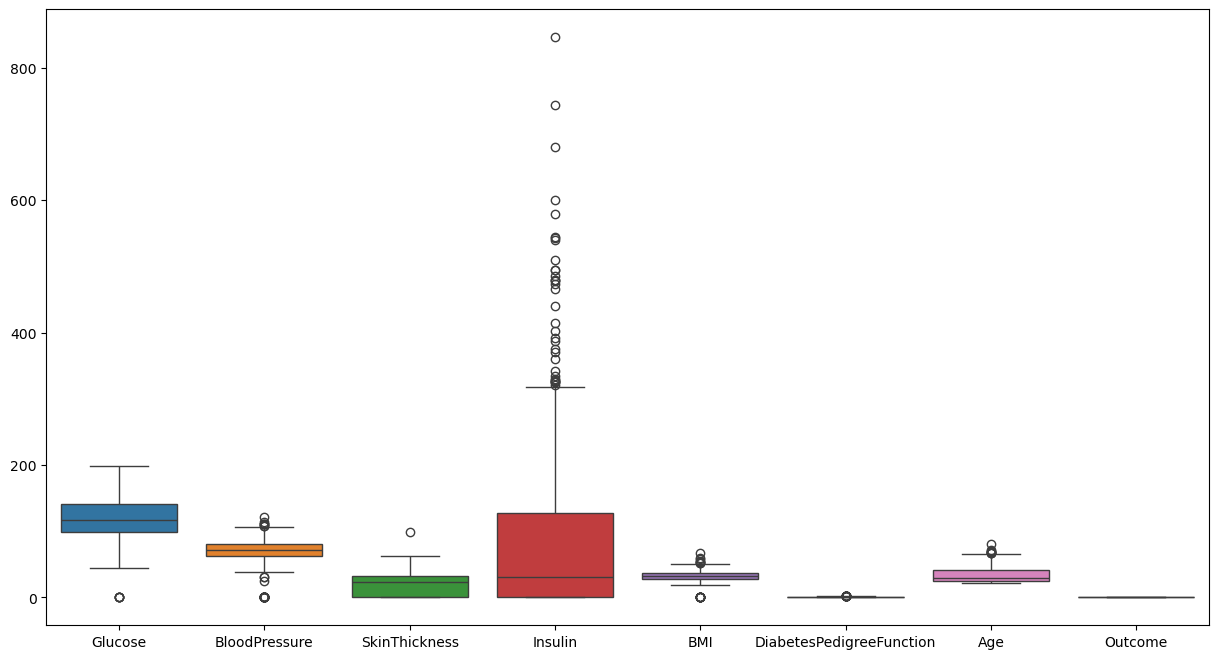

In [4]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

In [5]:
one_col=df['Outcome']
one_col

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
df=df.drop(['Outcome'],axis=1)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [7]:
def iqr_wins(df):
    df_out=df
    col_to_treat=df.columns
    for col in col_to_treat:
        q1=df_out[col].quantile(0.25)
        q3=df_out[col].quantile(0.75)
        iqr=q3-q1
        uf=q3+1.5*iqr
        lf=q1-1.5*iqr
        df_out.loc[df_out[col]>uf,col]=uf
        df_out.loc[df_out[col]<lf,col]=lf
    return df_out
        

In [8]:
treated_df=iqr_wins(df)
treated_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29888\2831702585.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '202.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[col]>uf,col]=uf
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29888\2831702585.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '318.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[col]>uf,col]=uf
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29888\2831702585.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[col]>uf,col]=uf


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72,35,0.0,33.6,0.627,50.0
1,85.0,66,29,0.0,26.6,0.351,31.0
2,183.0,64,0,0.0,23.3,0.672,32.0
3,89.0,66,23,94.0,28.1,0.167,21.0
4,137.0,40,35,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...
763,101.0,76,48,180.0,32.9,0.171,63.0
764,122.0,70,27,0.0,36.8,0.340,27.0
765,121.0,72,23,112.0,26.2,0.245,30.0
766,126.0,60,0,0.0,30.1,0.349,47.0


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
scaler=StandardScaler()
scaled=scaler.fit_transform(treated_df)
scaled_df=pd.DataFrame(scaled,columns=treated_df.columns)
scaled_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199
...,...,...,...,...,...,...,...
763,-0.646072,0.374620,1.735982,1.137221,0.109998,-1.008772,2.564372
764,0.027714,-0.048273,0.409758,-0.787602,0.663583,-0.416642,-0.533513
765,-0.004371,0.092691,0.157144,0.410066,-0.841032,-0.749497,-0.275356
766,0.156054,-0.753094,-1.295388,-0.787602,-0.287447,-0.385109,1.187534


In [22]:
X=scaled_df
y=one_col
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

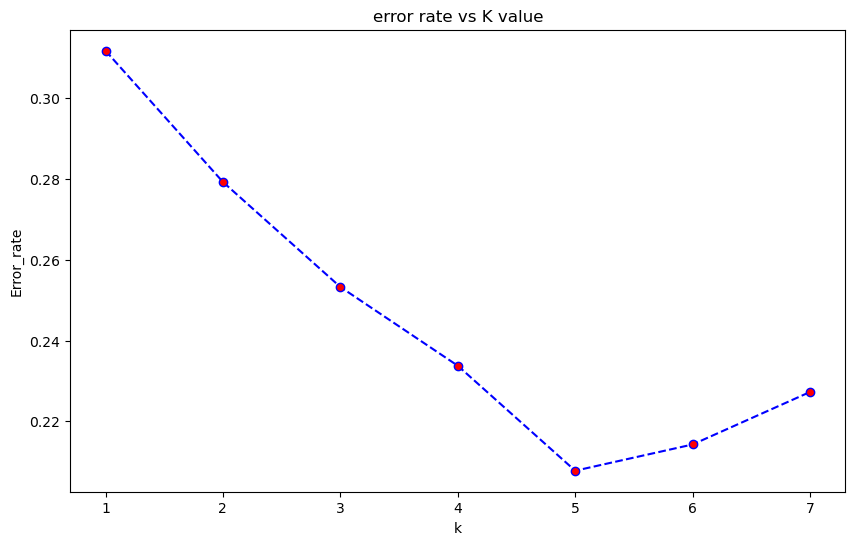

In [12]:
from sklearn import neighbors
error_rate=[]
for i in range(1,8):
    model=neighbors.KNeighborsClassifier(n_neighbors =i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,8),error_rate,color='blue',ls='dashed',marker='o',markerfacecolor='red')
plt.title('error rate vs K value')
plt.xlabel('k')
plt.ylabel('Error_rate')
plt.show()

In [13]:
# k=round(np.sqrt(768),0).astype(int)
# k

In [14]:
k=5

In [15]:
from sklearn import neighbors
model_1=neighbors.KNeighborsClassifier(n_neighbors=k)
model_1.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred=model_1.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


print("accuracy_score",accuracy_score(y_pred,y_test))
print("recall score:",recall_score(y_pred,y_test,average='micro'))
print("f1_score:",f1_score(y_pred,y_test,average='micro'))
print("precision_score:",precision_score(y_pred,y_test,average='micro'))

accuracy_score 0.7922077922077922
recall score: 0.7922077922077922
f1_score: 0.7922077922077922
precision_score: 0.7922077922077922


In [30]:
from sklearn.metrics import roc_auc_score
# y_pred_prob =  model_1.predict_proba(X_test)
roc=roc_auc_score(y_test,model_1.predict_proba(X_test)[:,1],multi_class='ovr',average='macro')
roc

0.8067210180950488

In [3]:
# Interpretation
# Accuracy = 79.2%

# The model correctly classifies 79.2% of the test data.
# However, accuracy alone may be misleading in imbalanced datasets.
# Recall (Micro) = 79.2%

# Micro-averaged recall considers all samples equally, making it useful when class imbalance exists.
# This means 79.2% of actual positive instances were correctly identified.
# Precision (Micro) = 79.2%

# Precision measures how many predicted positives were actually correct.
# Since recall and precision are the same, it suggests a well-balanced model.
# F1-Score (Micro) = 79.2%

# Since precision and recall are equal, the F1-score is also the same.
# This indicates that the model balances precision and recall well.
# ROC-AUC (0.807)

# The ROC-AUC score of 0.807 suggests that the model has a strong discriminatory ability.
# A higher ROC-AUC (closer to 1) means the model can separate different classes well.

# The model performs well overall, with balanced precision, recall, and F1-score.
# The ROC-AUC score of 0.807 is strong, indicating good class separation.
# However, if the dataset is imbalanced, consider using macro-averaging instead of micro